In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [1]:
data_dir = r'../data/raw/set-a/set-a'
outcomes_path = r'../data/raw/Outcomes-a.txt'


In [ ]:
# Load outcomes
outcomes_df = pd.read_csv(outcomes_path)
outcomes_df.set_index('RecordID', inplace=True)

# Define static + dynamic feature containers
all_dynamic_features = set()
all_static_features = set()

# From outcomes
outcome_static_features = set(outcomes_df.columns) - {'RecordID'}
static_params = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight']
all_static_features.update(static_params)
all_static_features.update(outcome_static_features)


# Detect All Dynamic Feature & Static Feature Names from Raw Files

In [3]:
# Loop through all patient files and collect feature names
for file in os.listdir(data_dir):
    if file.endswith('.txt'):
        df = pd.read_csv(os.path.join(data_dir, file))
        all_params = df['Parameter'].unique()
        all_dynamic_features.update(all_params)

# Remove static features from dynamic list
all_dynamic_features = all_dynamic_features - all_static_features

# Sort both sets for consistency
all_static_features = sorted(all_static_features)
all_dynamic_features = sorted(all_dynamic_features)


In [4]:
static_data = []
dynamic_data = []

for file in os.listdir(data_dir):
    if file.endswith('.txt'):
        path = os.path.join(data_dir, file)
        df = pd.read_csv(path)

        # Extract RecordID
        rid = int(df[df['Parameter'] == 'RecordID']['Value'].values[0])
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

        # STATIC
        static_subset = df[df['Parameter'].isin(all_static_features)]
        static_dict = static_subset.drop_duplicates('Parameter').set_index('Parameter')['Value'].to_dict()
        static_dict['RecordID'] = rid
        static_data.append(static_dict)

        # DYNAMIC
        dynamic_subset = df[df['Parameter'].isin(all_dynamic_features)].copy()
        dynamic_subset['RecordID'] = rid
        dynamic_data.append(dynamic_subset)

# Create DataFrames
static_features_df = pd.DataFrame(static_data)
dynamic_features_df = pd.concat(dynamic_data, ignore_index=True)


In [ ]:
# Sort RecordID and Time
dynamic_features_df.sort_values(by=['RecordID', 'Time'], inplace=True)

# create a new data frame with pivoted data
pivoted_df = dynamic_features_df.pivot_table(
    index=['RecordID', 'Time'],
    columns='Parameter',
    values='Value',
    aggfunc='mean'
)

# Replace NaN with 0
pivoted_df.fillna(0, inplace=True)

pivoted_df.reset_index(inplace=True)

# Display the first few rows of the pivoted DataFrame
print("Pivoted DataFrame with RecordID, Time, and Parameters:")
display(pivoted_df.head())

Pivoted DataFrame with RecordID, Time, and Parameters:


Parameter,RecordID,Time,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,pH
0,132539,00:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,35.1,0.0,0.0,900.0,0.0,0.0
1,132539,00:37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,35.6,0.0,0.0,60.0,0.0,0.0
2,132539,01:37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0
3,132539,02:37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,0.0,0.0,0.0,170.0,0.0,0.0
4,132539,03:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print("Static Features DataFrame:")
print(static_features_df.shape)
display(static_features_df.head())

print("\n Dynamic Features DataFrame:")
print(pivoted_df.shape)
display(pivoted_df.head())


Static Features DataFrame:
(4000, 6)


,RecordID,Age,Gender,Height,ICUType,Weight
0,132539,54.0,0.0,-1.0,4.0,-1.0
1,132540,76.0,1.0,175.3,2.0,76.0
2,132541,44.0,0.0,-1.0,3.0,56.7
3,132543,68.0,1.0,180.3,3.0,84.6
4,132545,88.0,0.0,-1.0,3.0,-1.0



 Dynamic Features DataFrame:
(295354, 38)


Parameter,RecordID,Time,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,pH
0,132539,00:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,35.1,0.0,0.0,900.0,0.0,0.0
1,132539,00:37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,35.6,0.0,0.0,60.0,0.0,0.0
2,132539,01:37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0
3,132539,02:37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,0.0,0.0,0.0,170.0,0.0,0.0
4,132539,03:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Summarize the dynamic features
print("\nSummary Statistics for Dynamic Features:")
summary_stats = pivoted_df.drop(columns=['RecordID', 'Time']).describe()
display(summary_stats)

Parameter,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,pH
count,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,...,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000,295354.000000
mean,1.221350,4.241999,5.453711,0.023301,1.290925,0.031423,0.166928,0.071224,29.221687,0.059790,...,9.105647,3.675798,2.678055,58.534332,10.806315,0.010532,0.008626,54.719148,0.553368,0.617562
std,18.130474,130.936996,165.826066,0.266337,7.713882,0.683379,5.325008,0.478368,31.081900,0.181591,...,46.846718,8.045827,15.872891,61.889065,16.851688,0.464108,0.251546,132.680023,3.042356,3.138138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,...,0.000000,0.000000,0.000000,116.000000,36.200000,0.000000,0.000000,60.000000,0.000000,0.000000
max,2205.000000,11470.000000,18430.000000,5.300000,197.000000,47.700000,330.000000,22.100000,268.000000,1.000000,...,1047.000000,98.000000,100.000000,295.000000,42.100000,49.200000,24.910000,11000.000000,187.500000,735.000000


In [ ]:
# Summarize the static features
print("\nSummary Statistics for Static Features:")
summary_static = static_features_df.drop(columns=['RecordID']).describe()
display(summary_static)

,Age,Gender,Height,ICUType,Weight
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,64.247500,0.560750,88.919475,2.760000,74.75629
std,17.560946,0.497867,86.531203,1.002572,31.97107
min,15.000000,-1.000000,-1.000000,1.000000,-1.00000
25%,52.750000,0.000000,-1.000000,2.000000,62.00000
50%,67.000000,1.000000,152.400000,3.000000,76.20000
75%,78.000000,1.000000,170.200000,4.000000,90.42500
max,90.000000,1.000000,431.800000,4.000000,300.00000


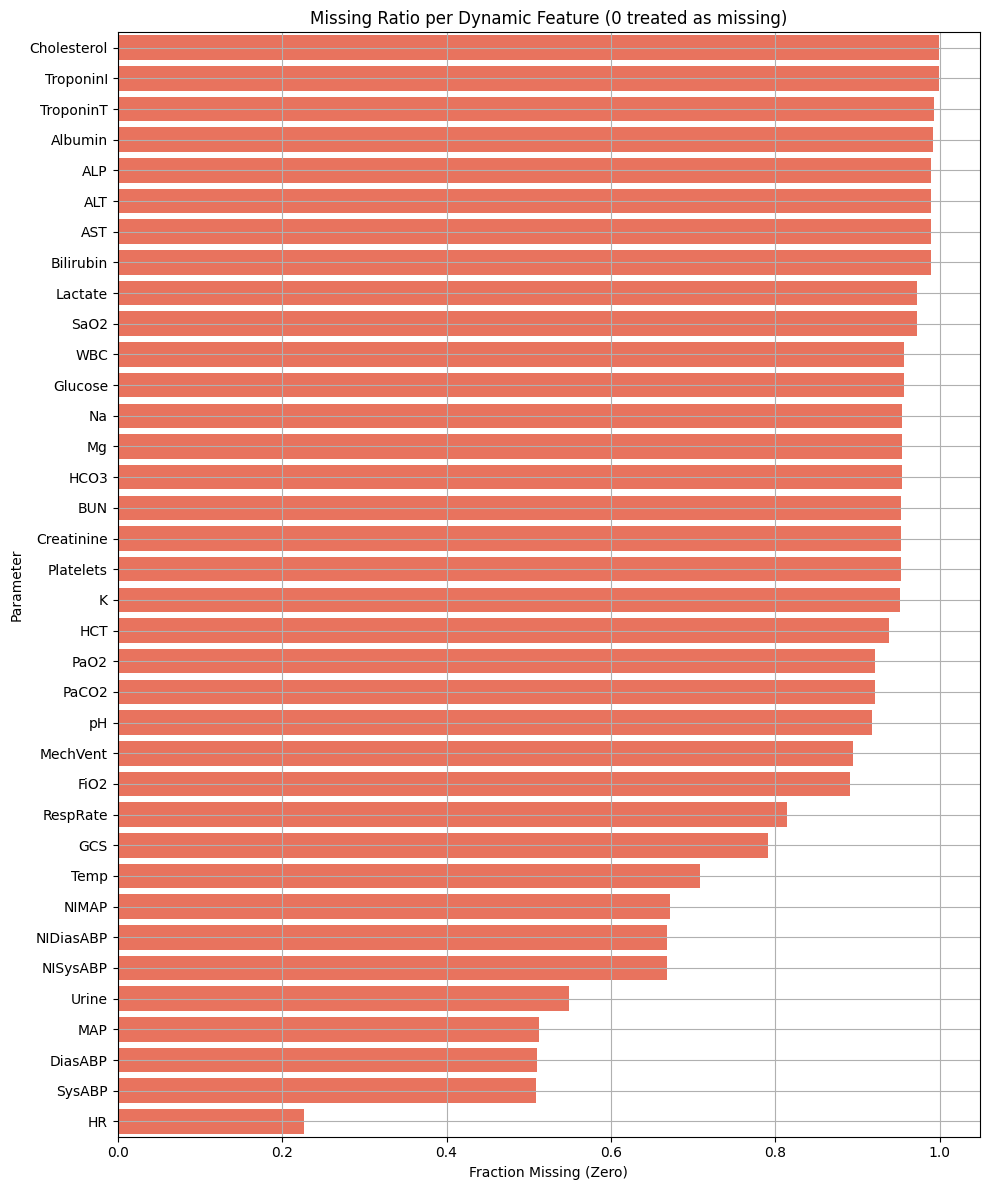

Top 10 features with most missing (zero) values:
Parameter
Cholesterol    0.998933
TroponinI      0.998527
TroponinT      0.992812
Albumin        0.992027
ALP            0.989538
ALT            0.989250
AST            0.989233
Bilirubin      0.989199
Lactate        0.972833
SaO2           0.972287
WBC            0.956324
Glucose        0.955948
Na             0.954089
Mg             0.954004
HCO3           0.953950
BUN            0.952918
Creatinine     0.952687
Platelets      0.952278
K              0.951143
HCT            0.938186
PaO2           0.921223
PaCO2          0.921135
pH             0.917540
MechVent       0.894554
FiO2           0.890335
RespRate       0.813837
GCS            0.791562
Temp           0.708160
NIMAP          0.672166
NIDiasABP      0.667832
NISysABP       0.667663
Urine          0.548677
MAP            0.512907
DiasABP        0.509450
SysABP         0.509182
HR             0.226261
dtype: float64


In [ ]:
# Exclude RecordID and Time
dynamic_columns = pivoted_df.columns.drop(['RecordID', 'Time'])

# Calculate missing ratios (treating 0 as missing)
missing_ratios = (pivoted_df[dynamic_columns] == 0).mean().sort_values(ascending=False)

# Plot missing ratios
plt.figure(figsize=(10, 12))
sns.barplot(x=missing_ratios.values, y=missing_ratios.index, color='tomato')
plt.title("Missing Ratio per Dynamic Feature (0 treated as missing)")
plt.xlabel("Fraction Missing (Zero)")
plt.tight_layout()
plt.grid(True)
plt.show()

# Display top 10 most affected
print("Top 10 features with most missing (zero) values:")
print(missing_ratios.head(100))


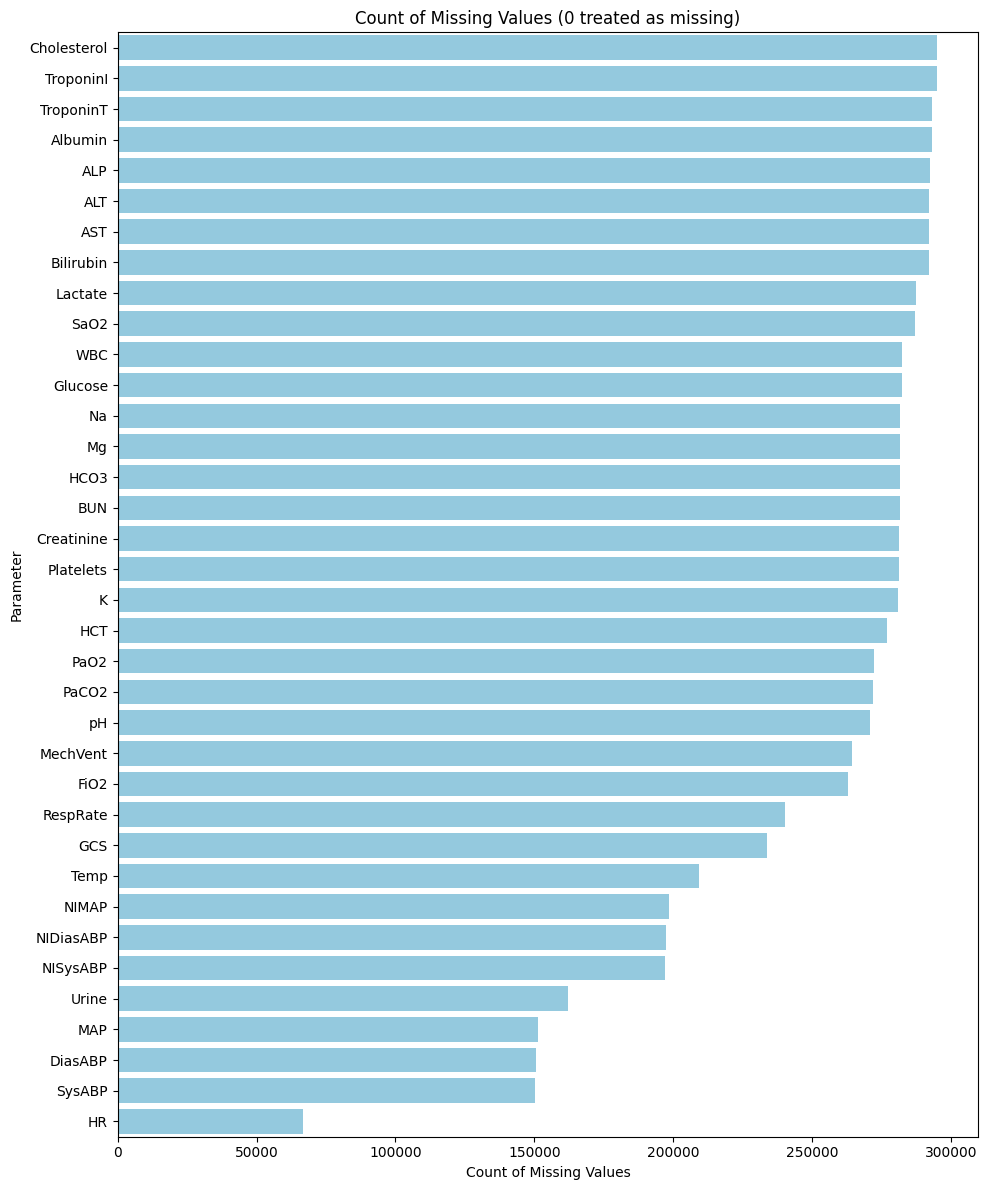

In [ ]:
# Count of Missing Values treating 0 as missing
missing_counts = (pivoted_df[dynamic_columns] == 0).sum().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
sns.barplot(x=missing_counts.values, y=missing_counts.index, color='skyblue')
plt.title("Count of Missing Values (0 treated as missing)")
plt.xlabel("Count of Missing Values")
plt.tight_layout()
plt.show()


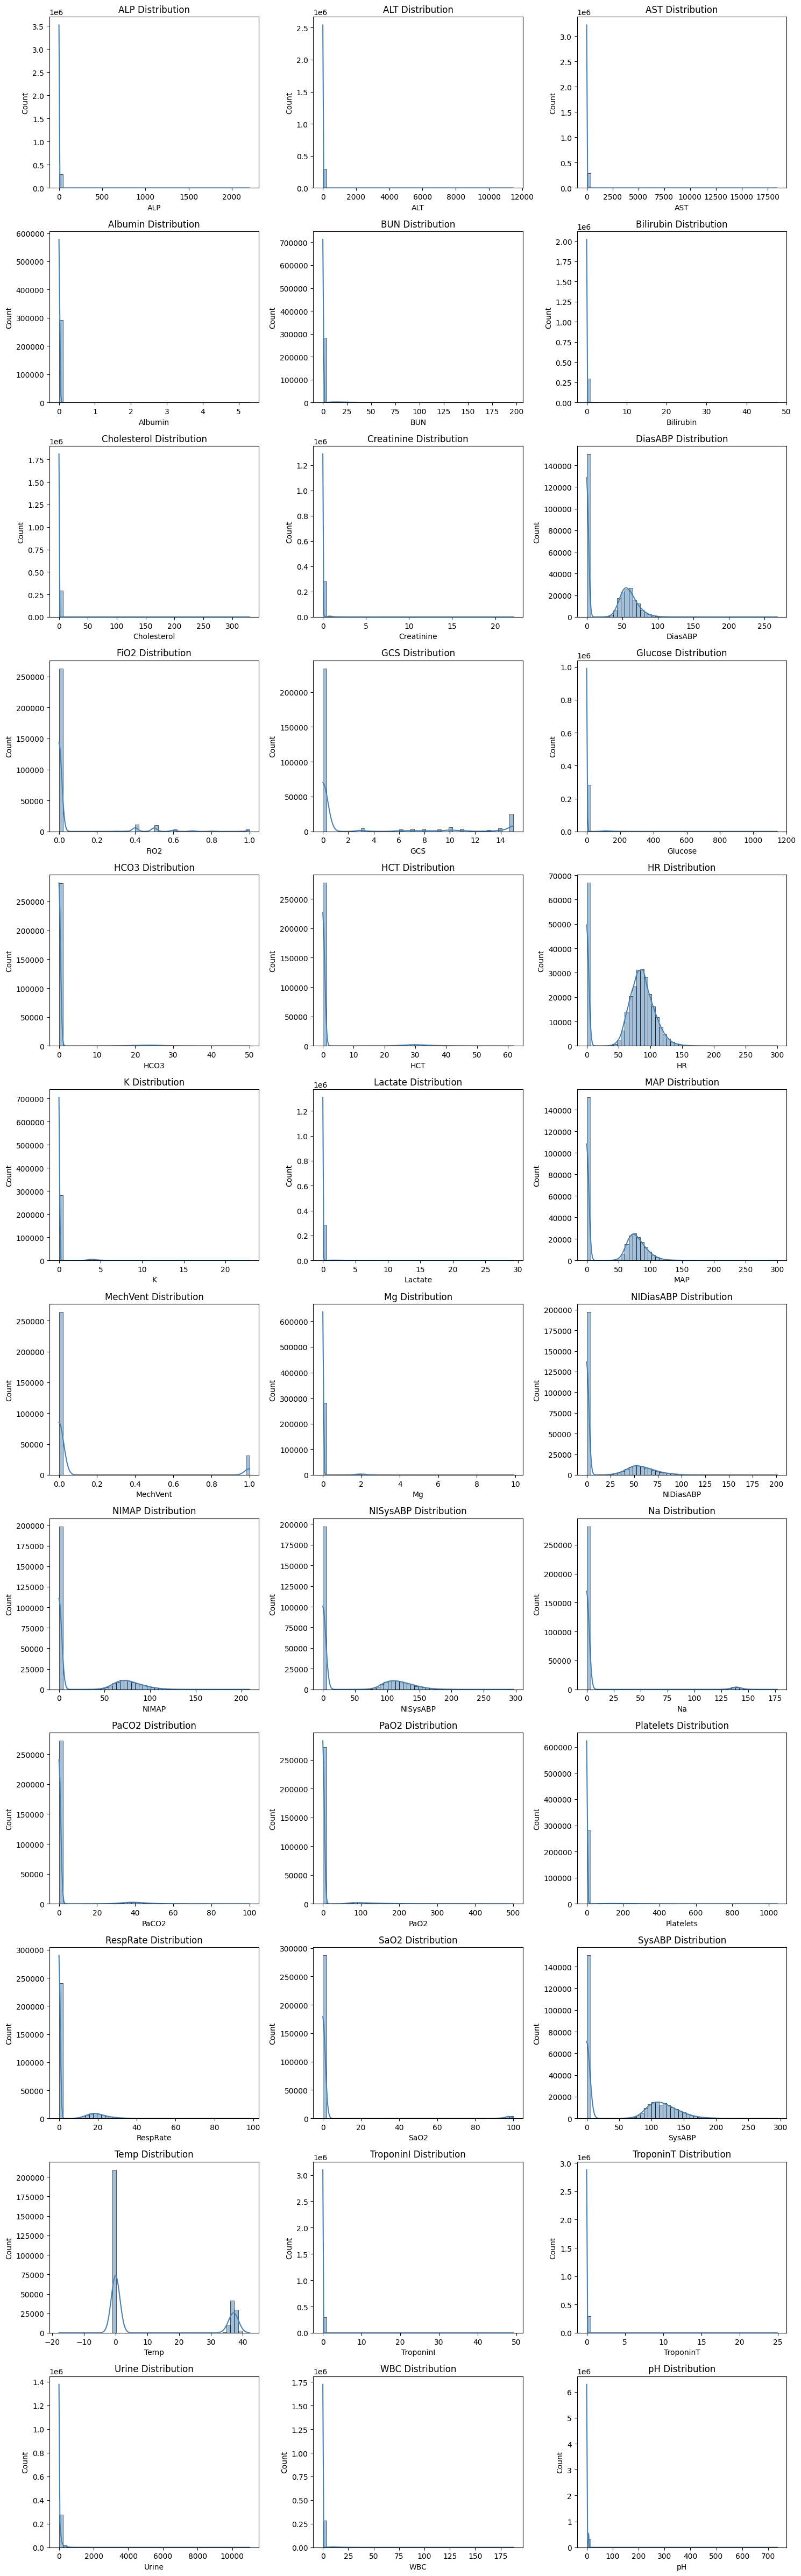

In [ ]:
# Drop non-feature columns
feature_cols = pivoted_df.columns.drop(['RecordID', 'Time'])

# Total number of plots
n_features = len(feature_cols)
n_cols = 3 
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot each feature's distribution
for i, feature in enumerate(feature_cols):
    ax = axes[i]
    sns.histplot(pivoted_df[feature], bins=50, kde=True, ax=ax, color='steelblue')
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# Distribution of Static Features (Age, Weight, ICUType)

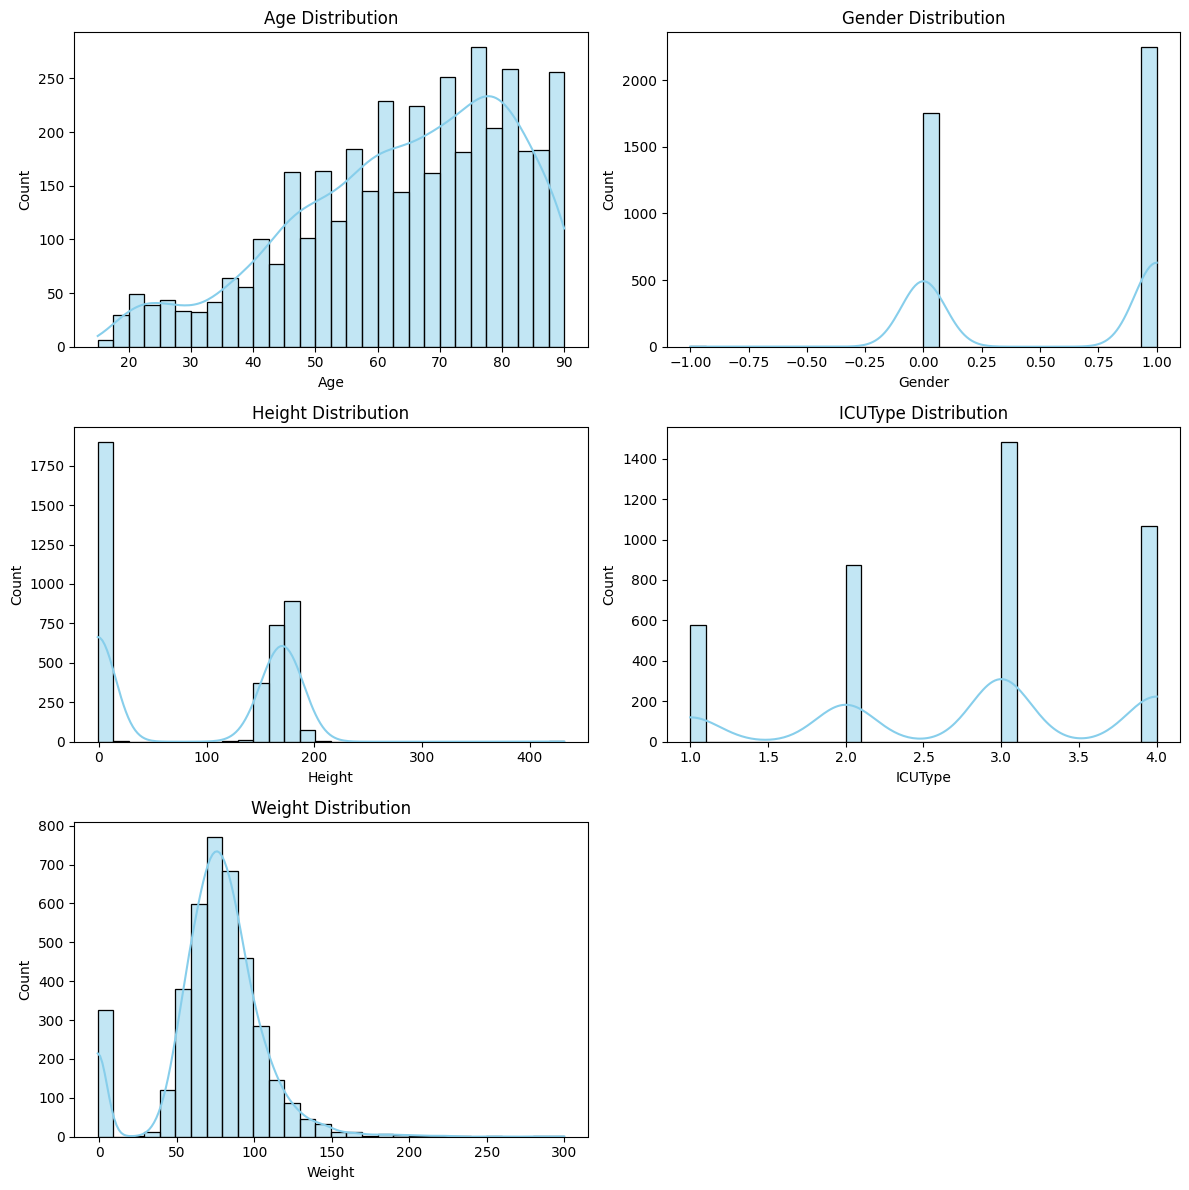

In [19]:
# Exclude non-numeric or categorical if needed
static_cols = static_features_df.columns.drop(['RecordID']) 

# Determine layout
n_features = len(static_cols)
n_cols = 2  # subplots per row
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot each static feature
for i, feature in enumerate(static_cols):
    ax = axes[i]
    
    if pd.api.types.is_numeric_dtype(static_features_df[feature]):
        sns.histplot(static_features_df[feature], bins=30, kde=True, ax=ax, color='skyblue')
        ax.set_ylabel('Count')
    else:
        sns.countplot(x=feature, data=static_features_df, ax=ax, color='salmon')
        ax.set_ylabel('Frequency')
    
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# Distribution of Time Points per Patient

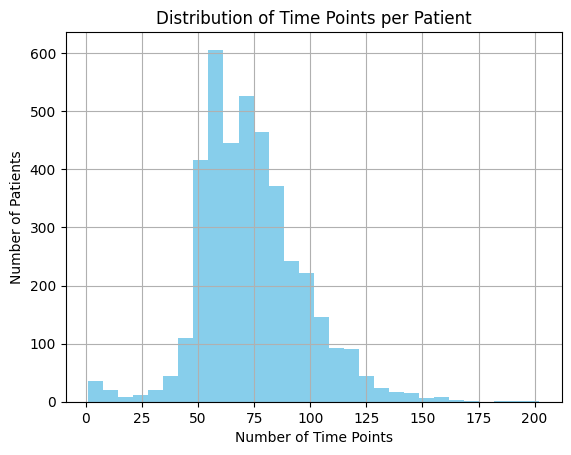

In [20]:
# Number of time points per patient
time_points = pivoted_df.groupby('RecordID').size()
plt.hist(time_points, bins=30, color='skyblue')
plt.title("Distribution of Time Points per Patient")
plt.xlabel("Number of Time Points")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()


# Plot Mortality Class Distribution

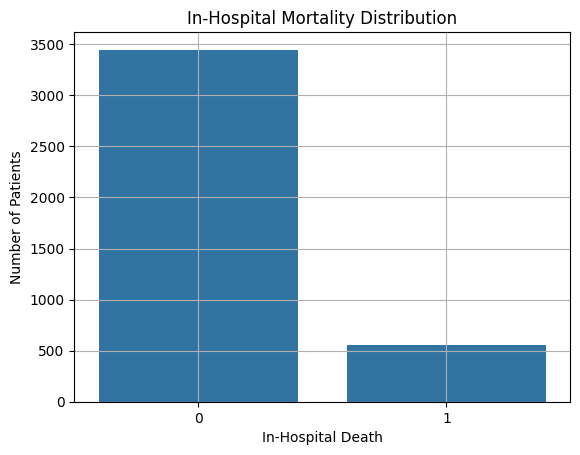

In [ ]:
# Reset index for plotting
outcomes_plot_df = outcomes_df.reset_index()

# Plot
sns.countplot(x='In-hospital_death', data=outcomes_plot_df)
plt.title("In-Hospital Mortality Distribution")
plt.xlabel("In-Hospital Death")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()


# Line Plot of Key Parameters Over Time

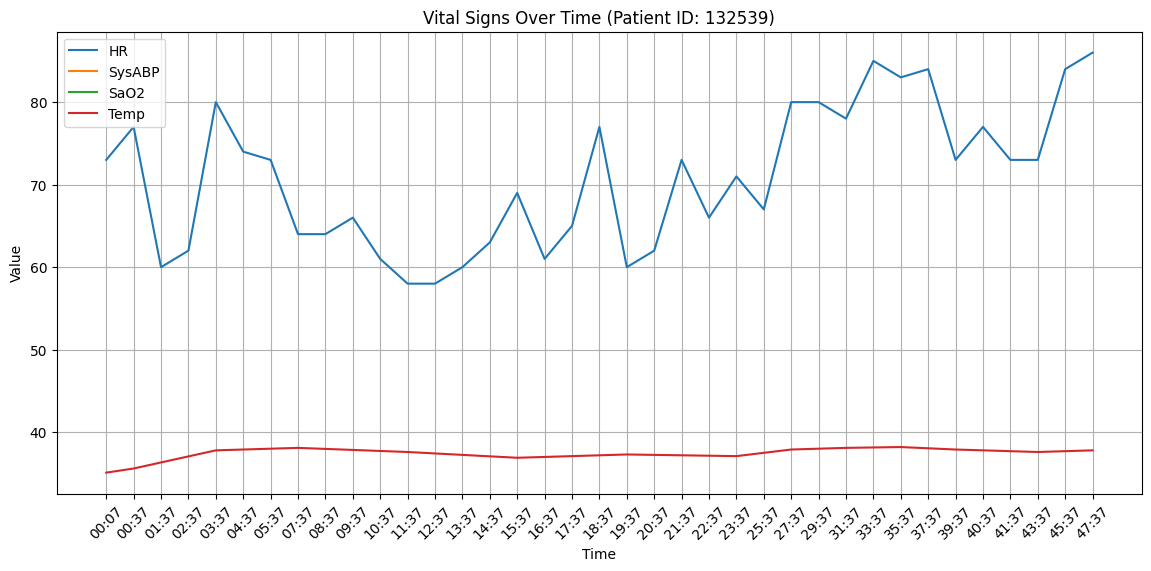

In [22]:
# Choose sample patient
sample_id = dynamic_features_df['RecordID'].unique()[0]
sample_df = dynamic_features_df[dynamic_features_df['RecordID'] == sample_id]

plt.figure(figsize=(14, 6))
for param in ['HR', 'SysABP', 'SaO2', 'Temp']:
    subset = sample_df[sample_df['Parameter'] == param]
    plt.plot(subset['Time'], subset['Value'], label=param)

plt.title(f"Vital Signs Over Time (Patient ID: {sample_id})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Parameter Frequency Plot

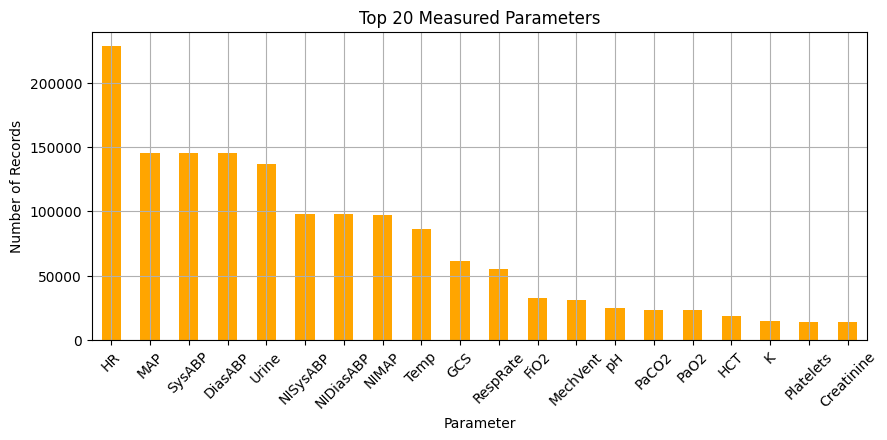

In [24]:
# Frequency of parameters measured
param_counts = dynamic_features_df['Parameter'].value_counts().sort_values(ascending=False)[:20]
param_counts.plot(kind='bar', figsize=(10, 4), color='orange')
plt.title("Top 20 Measured Parameters")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Mortality by ICUType

C:\Users\jegullin\AppData\Local\Temp\ipykernel_30292\861181058.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged, x='ICUType', y='In-hospital_death', ci=None)


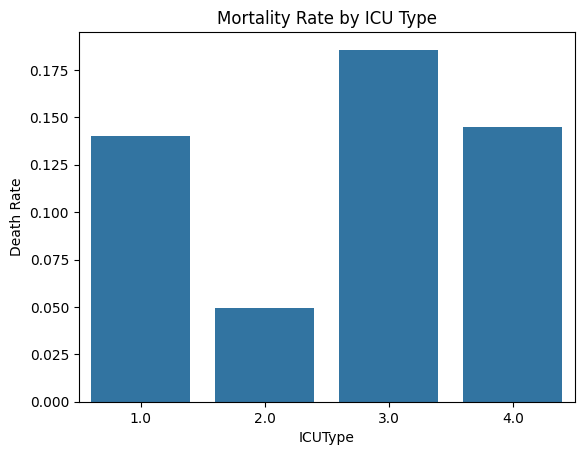

In [25]:
merged = static_features_df.merge(outcomes_df.reset_index(), on='RecordID')
sns.barplot(data=merged, x='ICUType', y='In-hospital_death', ci=None)
plt.title('Mortality Rate by ICU Type')
plt.ylabel('Death Rate')
plt.show()


# Plot Time Series for One Sample Patient

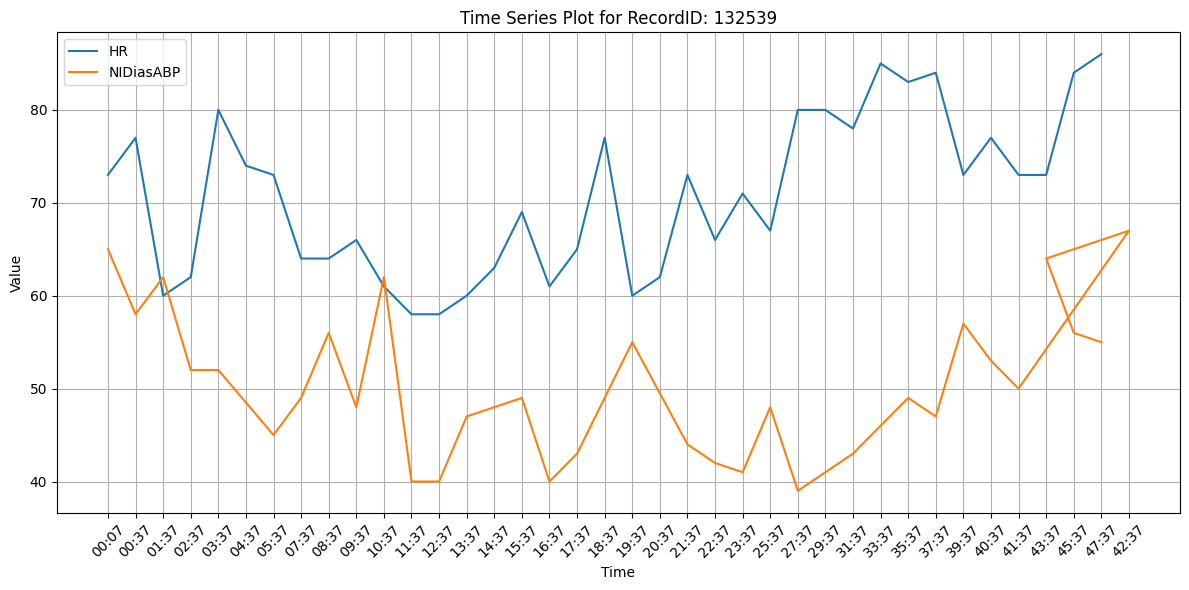

In [27]:
# Pick one random patient
sample_id = dynamic_features_df['RecordID'].unique()[0]
sample_df = dynamic_features_df[dynamic_features_df['RecordID'] == sample_id]

# Pick a few key variables to plot (if they exist)
variables_to_plot = ['HR', 'SysABP', 'NIDiasABP', 'SpO2']

plt.figure(figsize=(12, 6))
for var in variables_to_plot:
    if var in sample_df['Parameter'].unique():
        var_df = sample_df[sample_df['Parameter'] == var]
        plt.plot(var_df['Time'], var_df['Value'], label=var)

plt.title(f'Time Series Plot for RecordID: {sample_id}')
plt.xlabel("Time")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Boxplots of Key Dynamic Parameters by Outcome

C:\Users\jegullin\AppData\Local\Temp\ipykernel_30292\2709891212.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jegullin\AppData\Local\Temp\ipykernel_30292\2709891212.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jegullin\AppData\Local\Temp\ipykernel_30292\2709891212.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\jegullin\AppData\Local\Temp\ipykernel_30292\2709891212.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

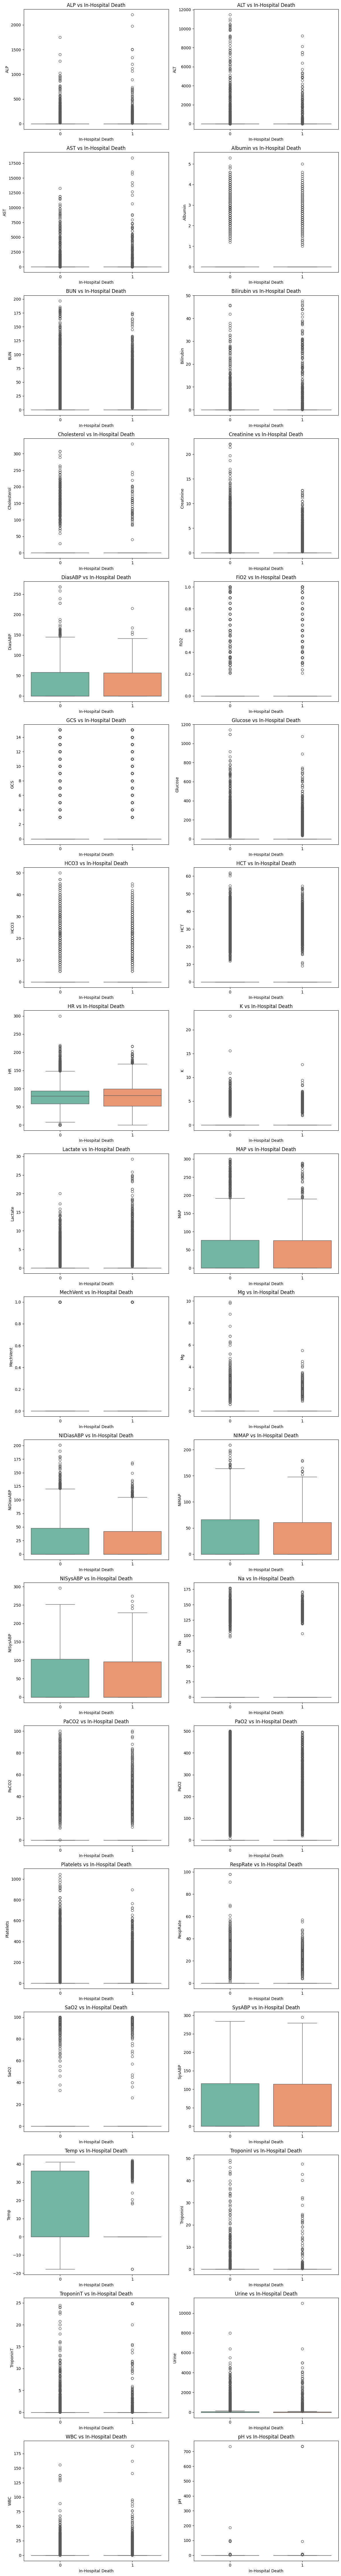

In [ ]:
# pivoted_df with outcome labels
outcomes_reset = outcomes_df.reset_index()[['RecordID', 'In-hospital_death']]
merged_df = pd.merge(pivoted_df, outcomes_reset, on='RecordID', how='inner')

# Drop Time for boxplot grouping
dynamic_features = merged_df.columns.drop(['RecordID', 'Time', 'In-hospital_death'])

# Plot settings
n_features = len(dynamic_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Generate boxplot for each dynamic feature
for i, feature in enumerate(dynamic_features):
    ax = axes[i]
    sns.boxplot(
        x='In-hospital_death',
        y=feature,
        data=merged_df,
        ax=ax,
        palette='Set2'
    )
    ax.set_title(f'{feature} vs In-Hospital Death')
    ax.set_xlabel("In-Hospital Death")
    ax.set_ylabel(feature)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# Correlation Heatmap of Static Features

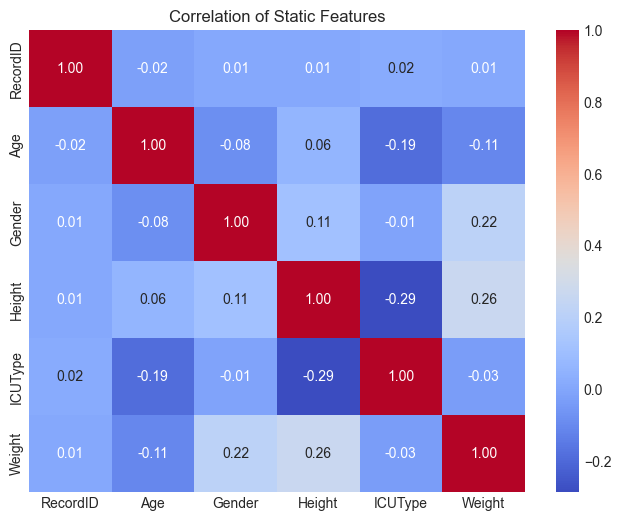

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(static_features_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Static Features')
plt.show()


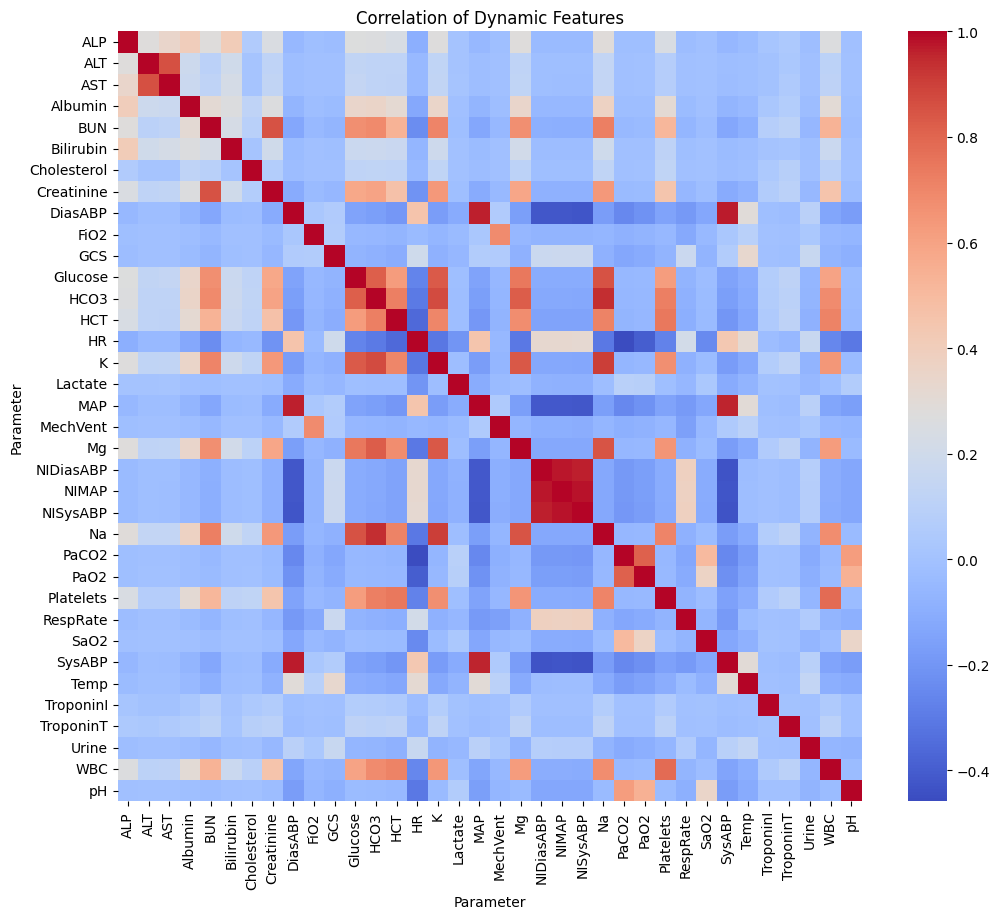

In [31]:
# Correlation matrix for dynamic features
plt.figure(figsize=(12, 10))
sns.heatmap(pivoted_df.drop(columns=['RecordID', 'Time']).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation of Dynamic Features')
plt.show()


# Correlation for all the features

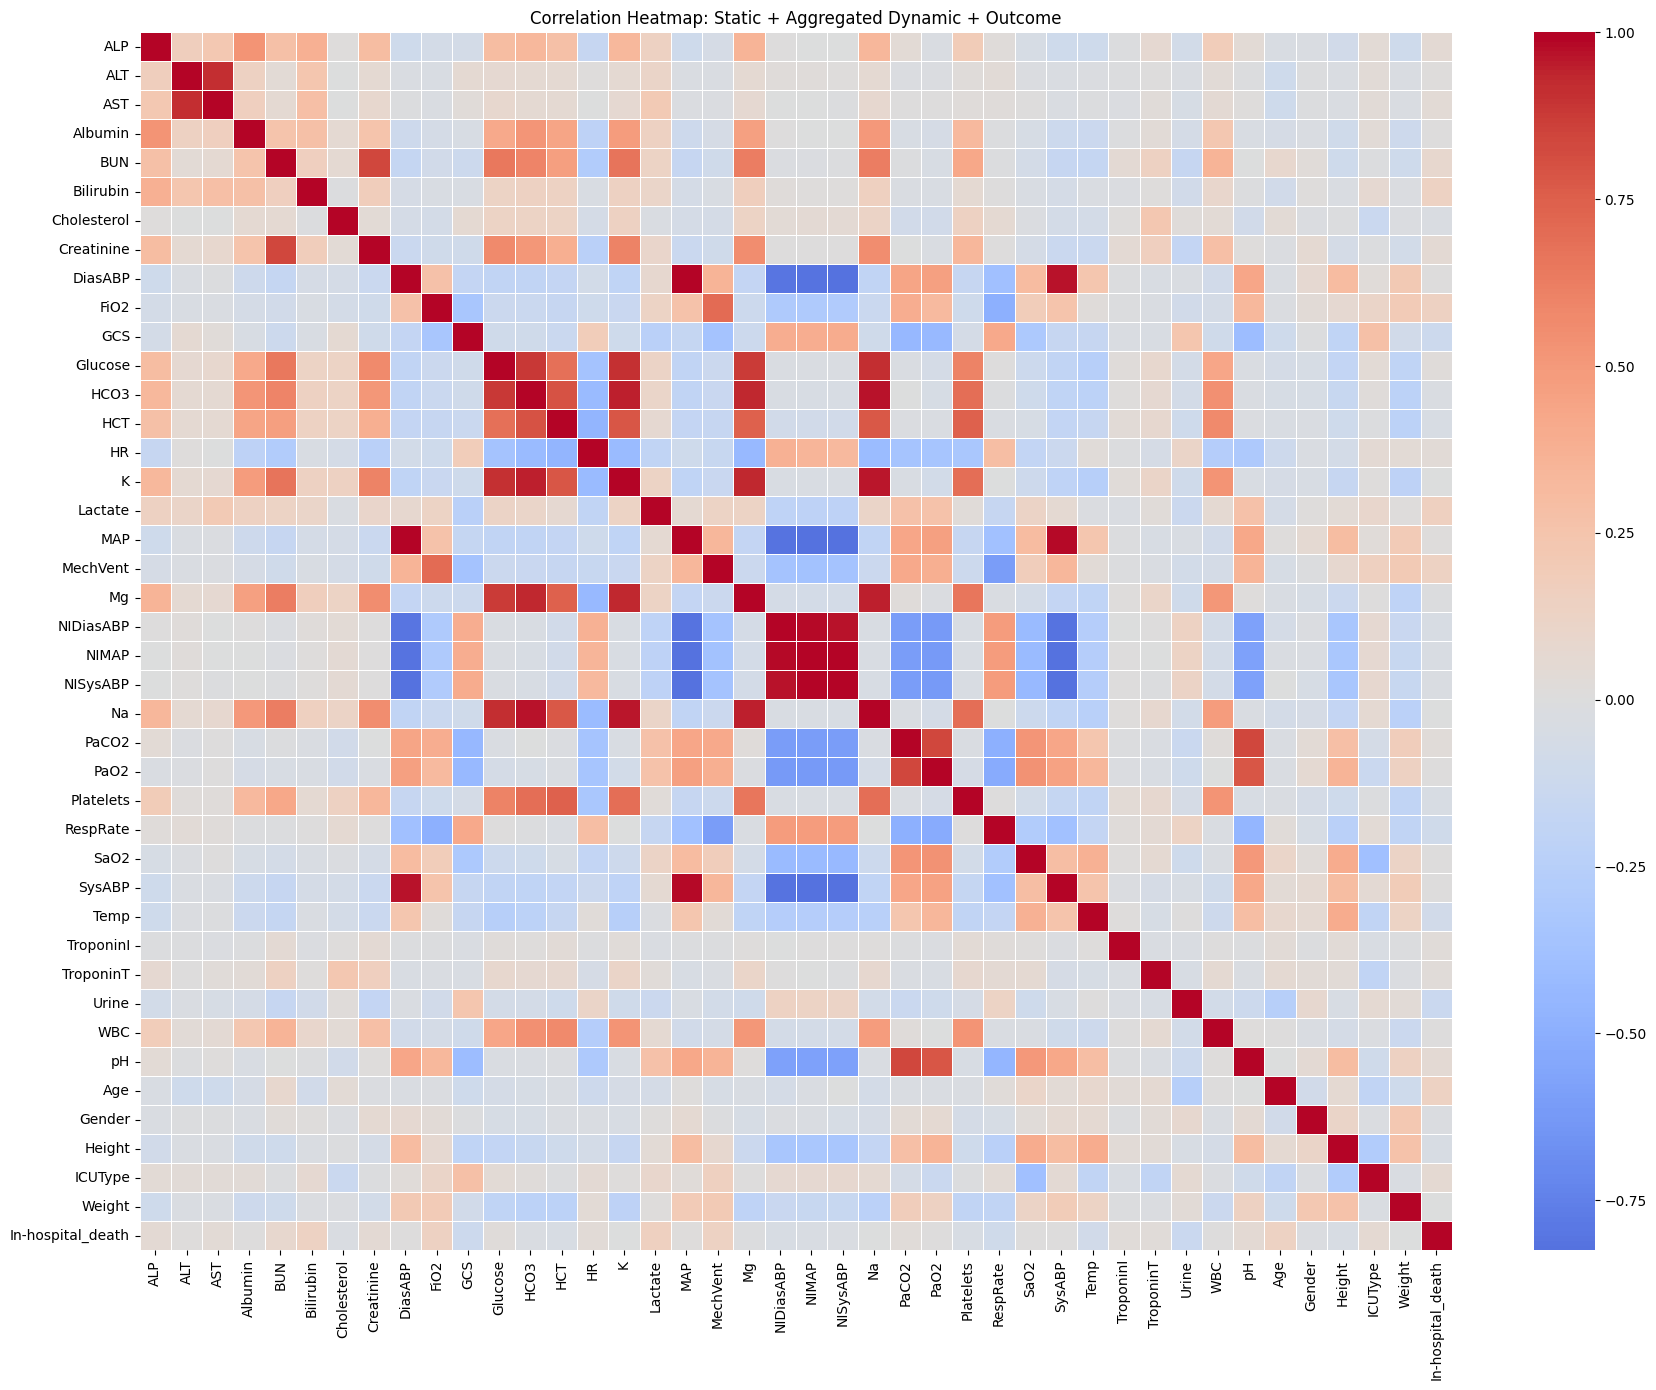

In [30]:
aggregated_dynamic_df = (
    pivoted_df
    .drop(columns=['Time'])  
    .groupby('RecordID')
    .mean()
    .reset_index()
)

merged_df = pd.merge(aggregated_dynamic_df, static_features_df, on='RecordID', how='inner')

outcome_col = outcomes_df.reset_index()[['RecordID', 'In-hospital_death']]
merged_df = pd.merge(merged_df, outcome_col, on='RecordID', how='inner')

corr_matrix = merged_df.drop(columns=['RecordID']).corr(numeric_only=True)

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, center=0, linewidths=0.5)
plt.title("Correlation Heatmap: Static + Aggregated Dynamic + Outcome")
plt.tight_layout()
plt.show()
